In [98]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [99]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
import numpy as np
import pandas as pd

# =========================
# Load data (from Subgoal 2 outputs)
# =========================
train_df = pd.read_csv("../../data/training_data.csv")
test_df  = pd.read_csv("../../data/test_data.csv")

# =========================
# Target & Features
# =========================
TARGET = "Close_Price_Normalized"   # <-- comes from Subgoal 2
DROP_COLS = ["Date", "Close_Price"]

X_train = train_df.drop(columns=DROP_COLS + [TARGET])
y_train = train_df[TARGET]

X_test  = test_df.drop(columns=DROP_COLS + [TARGET])
y_test  = test_df[TARGET]

# =========================
# Feature Engineering
# =========================
for df_ in [X_train, X_test]:
    df_["Price_Range"] = df_["High_Price"] - df_["Low_Price"]
    df_["Return_Volatility"] = df_["Daily_Return_Pct"] * df_["Volatility_Range"]
    df_["Volume_Impact"] = df_["Volume"] * df_["Daily_Return_Pct"]

# =========================
# Final Matrices
# =========================
print("Final input dimension:", X_train.shape[1])


Final input dimension: 15


In [101]:
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

In [102]:
# Ensure all features are numeric
X_train_ols = X_train_ols.astype(np.float64)
X_test_ols  = X_test_ols.astype(np.float64)

y_train     = y_train.astype(np.float64)
y_test      = y_test.astype(np.float64)

In [103]:
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary())

                              OLS Regression Results                              
Dep. Variable:     Close_Price_Normalized   R-squared:                       1.000
Model:                                OLS   Adj. R-squared:                  1.000
Method:                     Least Squares   F-statistic:                 3.918e+06
Date:                    Thu, 08 Jan 2026   Prob (F-statistic):               0.00
Time:                            13:27:10   Log-Likelihood:                 94427.
No. Observations:                   24000   AIC:                        -1.888e+05
Df Residuals:                       23985   BIC:                        -1.887e+05
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [104]:
ols_model.save("currentOlsSolution.pkl")


In [105]:
# =========================
# Predictions & Metrics
# =========================

y_pred = ols_model.predict(X_test_ols)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"OLS RMSE: {rmse:.6f}")
print(f"OLS R²:   {r2:.6f}")


OLS RMSE: 0.004719
OLS R²:   0.999568


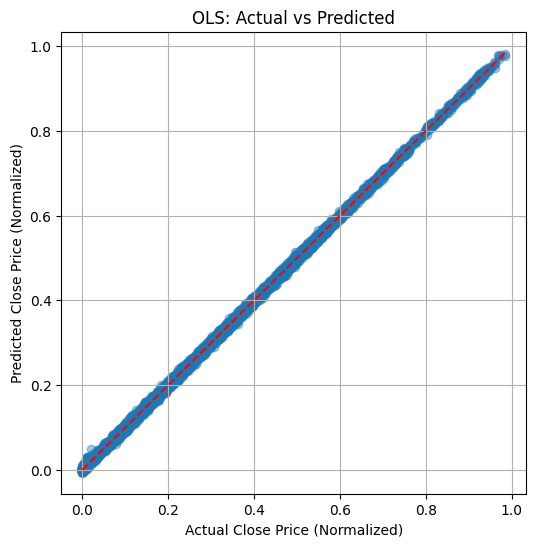

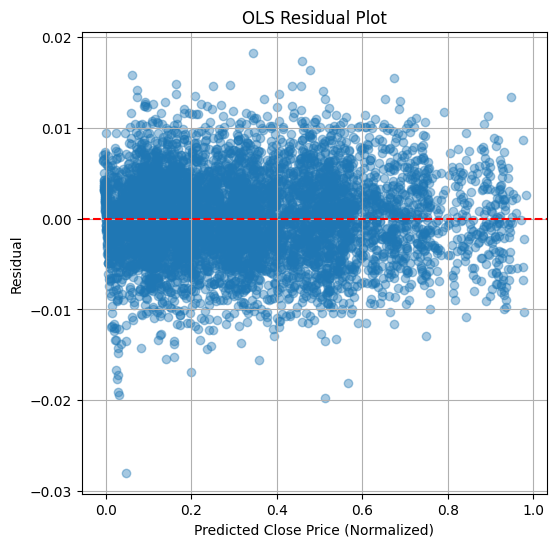

In [106]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Close Price (Normalized)")
plt.ylabel("Predicted Close Price (Normalized)")
plt.title("OLS: Actual vs Predicted")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Close Price (Normalized)")
plt.ylabel("Residual")
plt.title("OLS Residual Plot")
plt.grid(True)
plt.show()


In [107]:
print(train_df.columns)


Index(['Date', 'Open_Price', 'Close_Price', 'High_Price', 'Low_Price',
       'Volume', 'Daily_Return_Pct', 'Volatility_Range', 'VIX_Close',
       'Economic_News_Flag', 'Sentiment_Score', 'Federal_Rate_Change_Flag',
       'GeoPolitical_Risk_Score', 'Currency_Index', 'Close_Price_Normalized'],
      dtype='object')
